# Importy

In [138]:
import numpy as np
import pandas as pd

# Import danych

In [139]:
#Load the data from the file dane.csv to DataFrame and first row as header
df = pd.read_csv('dane.csv', header=0)

# Jak wyglądają dane

In [140]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,1617148800,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


# Oznaczenia
- Open -> Cena pierwszej transakcji w danym okresie czasu
- High -> Najwyższa cena w danym okresie czasu
- Low -> Najniższa cena w danym okresie czasu
- Close -> Cena ostatniej transakcji w danym okresie czasu 
- Volume_(BTC) -> łączna ilość wymienionych bitcoinów w danym okresie czasu
- Volume_(Currency) -> łączna kwota wszystkich transakcji w danym okresie czasu.
- Weighted_Price -> średnia cena bitcoina w danym okresie czasu

# Przekształcenie 'Timestamp' z int na date

In [142]:
#Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Timestamp'] = df['Timestamp'].dt.floor('min')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


# Ustawienie Timestamp jako index

In [143]:
#Set 'Timestamp' column as index
df.set_index('Timestamp', inplace=True)
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


# Przekształcenie danych co minutę na dane co godzinę

In [144]:
#Convert 'Timestamp' column 1H frequency
df = df.resample('1H').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume_(BTC)': 'sum',
    'Volume_(Currency)': 'sum',
    'Weighted_Price': 'mean'   
})
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000
2011-12-31 08:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
2011-12-31 09:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
2011-12-31 10:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
2011-12-31 11:00:00,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,59118.91,59135.00,58402.82,58669.04,118.576288,6.960580e+06,58682.385127
2021-03-30 21:00:00,58644.04,58872.27,58570.57,58759.04,57.605048,3.380143e+06,58705.094588
2021-03-30 22:00:00,58758.44,58941.34,58642.58,58711.15,68.019168,3.999820e+06,58788.454429


# Podstawowe info o danych

In [145]:
df.shape

(81066, 7)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81066 entries, 2011-12-31 07:00:00 to 2021-03-31 00:00:00
Freq: H
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               77534 non-null  float64
 1   High               77534 non-null  float64
 2   Low                77534 non-null  float64
 3   Close              77534 non-null  float64
 4   Volume_(BTC)       81066 non-null  float64
 5   Volume_(Currency)  81066 non-null  float64
 6   Weighted_Price     77534 non-null  float64
dtypes: float64(7)
memory usage: 4.9 MB


In [147]:
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,77534.000000,77534.000000,77534.000000,77534.000000,81066.000000,8.106600e+04,77534.000000
mean,4794.253073,4824.253301,4761.551381,4794.980842,415.612822,1.861709e+06,4794.586897
std,8278.126181,8339.353980,8212.560526,8280.355857,660.723602,4.814568e+06,8279.529492
min,3.800000,4.140000,1.500000,4.140000,0.000000,0.000000e+00,4.140000
25%,286.852500,288.275000,285.000000,287.000000,93.031939,4.253985e+04,286.867022
50%,788.640000,791.870000,783.630000,788.635000,224.466581,2.782766e+05,788.595951
75%,7422.015000,7462.000000,7382.505000,7424.997500,483.732387,1.642141e+06,7425.971393
max,61601.930000,61781.830000,61095.030000,61601.930000,20551.251040,2.475085e+08,61363.600604


# Ile wieszy nie zawiera danych

In [148]:
#Count how many rows contain NaN
df.isnull().sum()

Open                 3532
High                 3532
Low                  3532
Close                3532
Volume_(BTC)            0
Volume_(Currency)       0
Weighted_Price       3532
dtype: int64

# Czy jeśli wiersz nie zawiera jakiś danych to nie zawiera danych od Open do Weighted_Price

In [149]:
df.isnull().sum(axis=1).unique()

array([0, 5], dtype=int64)

Zatem odpowiedź na to pytanie jest pozytywna

# Czy w 'Timestamp' nie ma przesku większego niż godzina

In [150]:
#show array of diffrence beetwen index 'Timestamp' and line below index 'Timestamp'
df.index.to_series().diff().unique()

array([        'NaT', 3600000000000], dtype='timedelta64[ns]')

# Ile procent danych stanowią wiersze z brakującymi danymi

In [151]:
#Count how Many rows contain NaN and count how many percent of all rows it is
df.isnull().sum() / df.shape[0] * 100

Open                 4.356944
High                 4.356944
Low                  4.356944
Close                4.356944
Volume_(BTC)         0.000000
Volume_(Currency)    0.000000
Weighted_Price       4.356944
dtype: float64

# Macierz korelacji

In [152]:
#Create corelation matrix as plot including index column 'Timestamp'
df.corr().style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,0.999963,0.999945,0.999930,-0.024214,0.598244,0.999975
High,0.999963,1.000000,0.999920,0.999964,-0.022757,0.601224,0.999981
Low,0.999945,0.999920,1.000000,0.999953,-0.026500,0.593372,0.999973
Close,0.999930,0.999964,0.999953,1.000000,-0.024444,0.598066,0.999976
Volume_(BTC),-0.024214,-0.022757,-0.026500,-0.024444,1.000000,0.328529,-0.024475
Volume_(Currency),0.598244,0.601224,0.593372,0.598066,0.328529,1.000000,0.597766
Weighted_Price,0.999975,0.999981,0.999973,0.999976,-0.024475,0.597766,1.000000


# Przedstwienie cen bitcoina w czasie

<Axes: xlabel='Timestamp'>

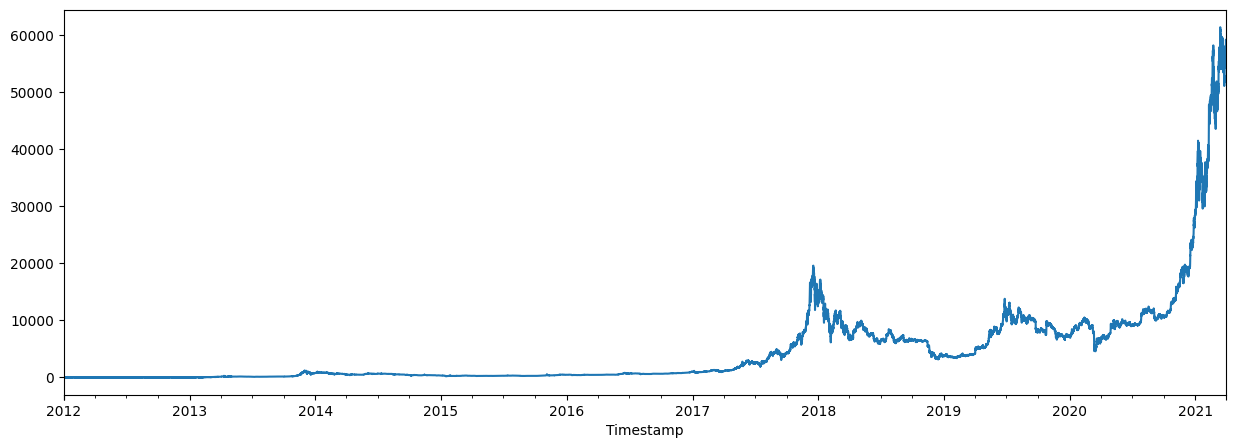

In [153]:
#Create plot with index column 'Timestamp' as x-axis and 'Weighted_Price' as y-axis
df['Weighted_Price'].plot(figsize=(15, 5))

# Uzupełnianie missing data
Skoro dane są sekwencyjne najlepiej je będzie uzupełnić wcześniejszą wartością

In [154]:
#Fill Open	High	Low	Close	Volume_(BTC)	Volume_(Currency)	Weighted_Price  missing data using data before missing data
df.fillna(method='ffill', inplace=True)
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000
2011-12-31 08:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
2011-12-31 09:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
2011-12-31 10:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
2011-12-31 11:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000
...,...,...,...,...,...,...,...
2021-03-30 20:00:00,59118.91,59135.00,58402.82,58669.04,118.576288,6.960580e+06,58682.385127
2021-03-30 21:00:00,58644.04,58872.27,58570.57,58759.04,57.605048,3.380143e+06,58705.094588
2021-03-30 22:00:00,58758.44,58941.34,58642.58,58711.15,68.019168,3.999820e+06,58788.454429


# Dodanie kolumny Future_Weighted_Price
Dodajemy ją gdyż chcemy przewidzieć średnią wartość bitcoina dnia następnego a na ten czas nie posiadamy takiej kolumny. Po czymś takim możemy zbadać korelacje w sposób dokładniejszy.

In [155]:
#Add column 'Future_Wighted_Price' with data from column 'Weighted_Price' shifted by n row down
n = 24 # 24 hours
df['Future_Weighted_Price'] = df['Weighted_Price'].shift(-n)
#show df every n-th row
df.iloc[::n, :]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Future_Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000,4.580000
2012-01-01 07:00:00,4.58,4.58,4.58,4.58,0.000000,0.000000e+00,4.580000,5.000000
2012-01-02 07:00:00,5.00,5.00,5.00,5.00,0.000000,0.000000e+00,5.000000,5.000000
2012-01-03 07:00:00,5.00,5.00,5.00,5.00,0.000000,0.000000e+00,5.000000,4.930000
2012-01-04 07:00:00,4.93,4.93,4.93,4.93,0.000000,0.000000e+00,4.930000,5.777027
...,...,...,...,...,...,...,...,...
2021-03-26 07:00:00,52600.90,53698.99,52418.94,53650.42,543.675532,2.885299e+07,52879.653391,54960.199202
2021-03-27 07:00:00,55015.12,55129.29,54756.39,54982.82,60.429168,3.320426e+06,54960.199202,56084.451395
2021-03-28 07:00:00,55927.05,56277.89,55872.28,56212.33,43.480715,2.440264e+06,56084.451395,55882.718336


# Usunięcie ostatnich n wierszy z powodu braku danych do 'Future_Weighted_Price'

In [156]:
#Remove n last rows
df = df.iloc[:-n, :]
df

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Future_Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:00:00,4.39,4.39,4.39,4.39,0.455581,2.000000e+00,4.390000,4.580000
2011-12-31 08:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
2011-12-31 09:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
2011-12-31 10:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
2011-12-31 11:00:00,4.39,4.39,4.39,4.39,0.000000,0.000000e+00,4.390000,4.580000
...,...,...,...,...,...,...,...,...
2021-03-29 20:00:00,57665.67,57728.76,57091.37,57248.20,290.874268,1.669743e+07,57420.161270,58682.385127
2021-03-29 21:00:00,57227.51,57622.98,57171.89,57555.94,167.605375,9.616739e+06,57389.899424,58705.094588
2021-03-29 22:00:00,57545.45,57904.40,57447.13,57728.96,153.997010,8.888151e+06,57711.070913,58788.454429


# Macierz korelacji gdy posiadamy dodatkową kolumnę

In [157]:
#Create corelation matrix as plot including index column 'Timestamp'
df.corr().style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Future_Weighted_Price
Open,1.000000,0.999963,0.999945,0.999930,-0.007013,0.603431,0.999975,0.998452
High,0.999963,1.000000,0.999920,0.999964,-0.005591,0.606375,0.999981,0.998491
Low,0.999945,0.999920,1.000000,0.999953,-0.009255,0.598605,0.999973,0.998474
Close,0.999930,0.999964,0.999953,1.000000,-0.007242,0.603254,0.999976,0.998515
Volume_(BTC),-0.007013,-0.005591,-0.009255,-0.007242,1.000000,0.328792,-0.007273,-0.006665
Volume_(Currency),0.603431,0.606375,0.598605,0.603254,0.328792,1.000000,0.602952,0.602855
Weighted_Price,0.999975,0.999981,0.999973,0.999976,-0.007273,0.602952,1.000000,0.998495
Future_Weighted_Price,0.998452,0.998491,0.998474,0.998515,-0.006665,0.602855,0.998495,1.000000


# Usunięcie niepotrzenych kolumn
Usuwam Open, High, Low, Close mimo wysokiej korelacji z tego względu, że kolumna weighted_price jest na nich liczona

In [158]:
#Stay only column 'Weighted_Price', 'Volume_Currency' and 'Future_Weighted_Price'
# df = df[['Weighted_Price', 'Volume_(Currency)', 'Future_Weighted_Price']]
df = df[['Weighted_Price', 'Future_Weighted_Price']]
df

,Weighted_Price,Future_Weighted_Price
Timestamp,,
2011-12-31 07:00:00,4.390000,4.580000
2011-12-31 08:00:00,4.390000,4.580000
2011-12-31 09:00:00,4.390000,4.580000
2011-12-31 10:00:00,4.390000,4.580000
2011-12-31 11:00:00,4.390000,4.580000
...,...,...
2021-03-29 20:00:00,57420.161270,58682.385127
2021-03-29 21:00:00,57389.899424,58705.094588
2021-03-29 22:00:00,57711.070913,58788.454429


# Stworzenie "okien" o rozmiarze m
Nie wyczytałem tego bezpośrednio z danych ale udało mi się znaleźć taką informacje na internecie, że ludzie przewidują na podstawie danych z większej ilości dni. Oznacza to, że jeśli chcę zwiekszyć dokładność to muszę mieć większy zakres informacji o cenach

In [159]:
m = 24 # 24 hours
X = []
y = []
for i in range(m, df.shape[0]):
    # X.append(df.iloc[i-m:i, 0:2].values)
    X.append(df.iloc[i-m:i, 0:1].values)
    # y.append(df.iloc[i, 2])
    y.append(df.iloc[i, 1])
X, y = np.array(X), np.array(y)

In [160]:
X.shape, y.shape

((81018, 24, 1), (81018,))

# Dzielenie na zbiór treningowy i testowy

In [161]:
#Split data into train and test set using train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60763, 24, 1), (20255, 24, 1), (60763,), (20255,))

# Znajdowanie optymalnych paramatrów

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 24, 50)            10400     
                                                                 
 dropout_12 (Dropout)        (None, 24, 50)            0         
                                                                 
 lstm_19 (LSTM)              (None, 24, 50)            20200     
                                                                 
 dropout_13 (Dropout)        (None, 24, 50)            0         
                                                                 
 lstm_20 (LSTM)              (None, 50)                20200     
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trai

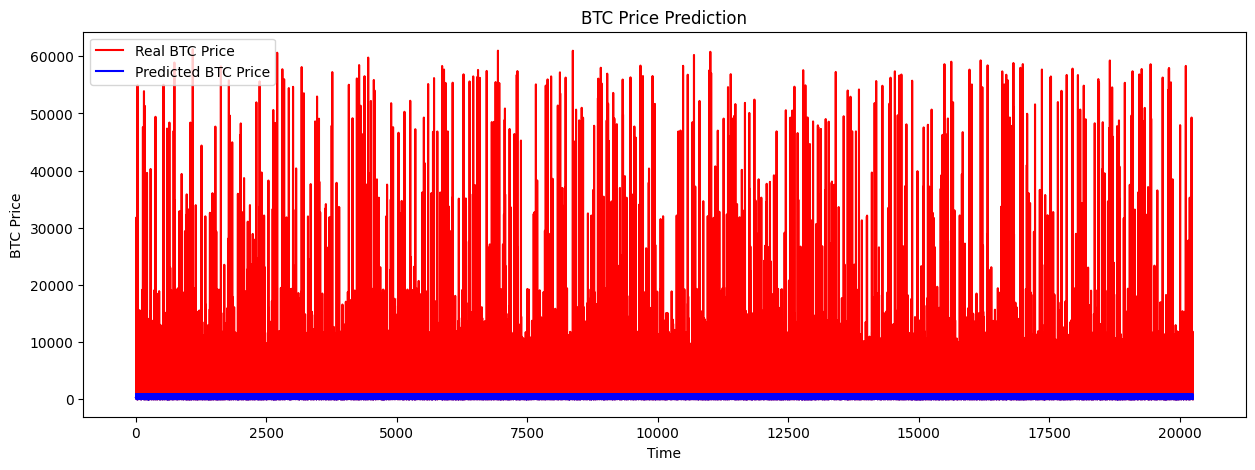

In [162]:
#Create model LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=10))
model.add(Dense(units=1))

model.summary()

#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

#Fit model
model.fit(X_train, y_train, epochs=10, batch_size=32)

#Evaluate model
model.evaluate(X_test, y_test)

#Predict model
y_pred = model.predict(X_test)

#Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(y_test, color='red', label='Real BTC Price')
plt.plot(y_pred, color='blue', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()

633/633 [==============================] - 5s 6ms/step


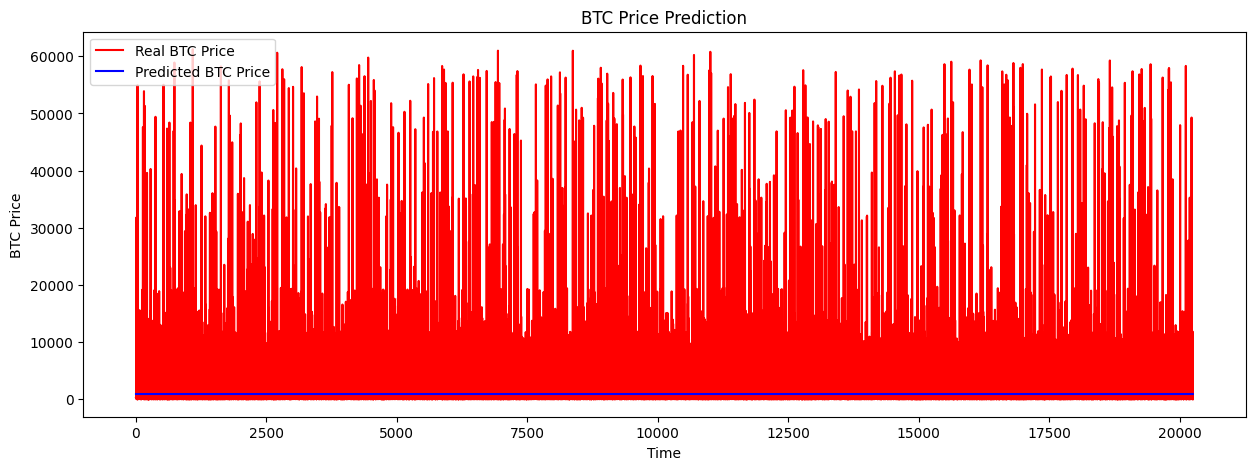

In [136]:
#test model
y_pred = model.predict(X_test)
y_pred

#show plot with y_test and y_pred
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(y_test, color='red', label='Real BTC Price')
plt.plot(y_pred, color='blue', label='Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()